In [75]:
import os

# List files in the directory
print(os.listdir(r'C:\Users\hp\Music\data'))

import os
print(os.getcwd())
import pandas as pd
import os

# List files to check if 'togo-dapaong_qc.csv' exists
print(os.listdir(r'C:\Users\hp\Music\data'))

# Load the dataset with the correct path
df = pd.read_csv(r'C:\Users\hp\Music\data\togo-dapaong_qc.csv', encoding='latin-1')

# Display the first few rows
df.head()



['benin-malanville.csv', 'benin_clean.csv', 'sierraleone-bumbuna.csv', 'togo-dapaong_qc.csv']
c:\Users\hp\Documents\Custom Office Templates\10 academy\solar-energy_-challenge_week1-\notebooks
['benin-malanville.csv', 'benin_clean.csv', 'sierraleone-bumbuna.csv', 'togo-dapaong_qc.csv']


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [76]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [77]:
missing_values = df.isna().sum()
print(missing_values)

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [78]:
total_rows = len(df)
missing_percentage = (missing_values / total_rows) * 100
columns_with_missing = missing_percentage[missing_percentage > 5]

print(columns_with_missing)

Comments    100.0
dtype: float64


In [79]:
from scipy import stats
import numpy as np

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df[['GHI', 'DNI', 'DHI']]))

# Remove outliers
df_clean = df[(z_scores < 3).all(axis=1)]

In [80]:
from scipy.stats import zscore

# Compute Z-scores for specified columns
df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']] = zscore(df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']])

In [81]:
# Flagging outliers
outliers = (abs(df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']]) > 3)

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


C:\Users\hp\AppData\Local\Temp\ipykernel_34204\3938322837.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M')['GHI'].mean().plot(title='Monthly Average GHI')


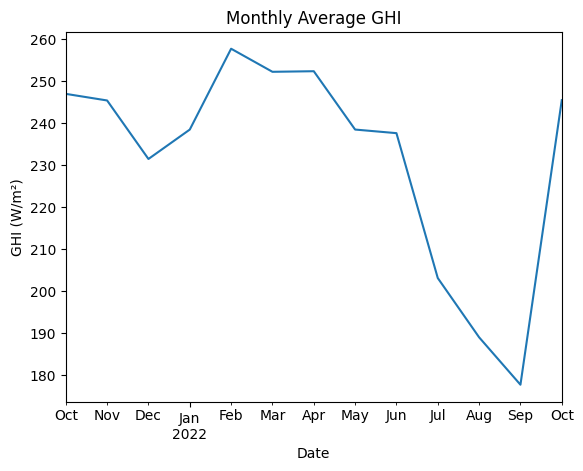

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\hp\Music\data\togo-dapaong_qc.csv', encoding='latin-1')
print(df.columns)

# Convert the 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set the 'Timestamp' as the index
df.set_index('Timestamp', inplace=True)

# Resample data by month and plot
df.resample('M')['GHI'].mean().plot(title='Monthly Average GHI')
plt.xlabel('Date')
plt.ylabel('GHI (W/m²)')
plt.show()

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\hp\Music\data\togo-dapaong_qc.csv', encoding='latin-1')
print(df.columns)

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


In [84]:
print(df.head())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [85]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [99]:
df.set_index('Timestamp', inplace=True)

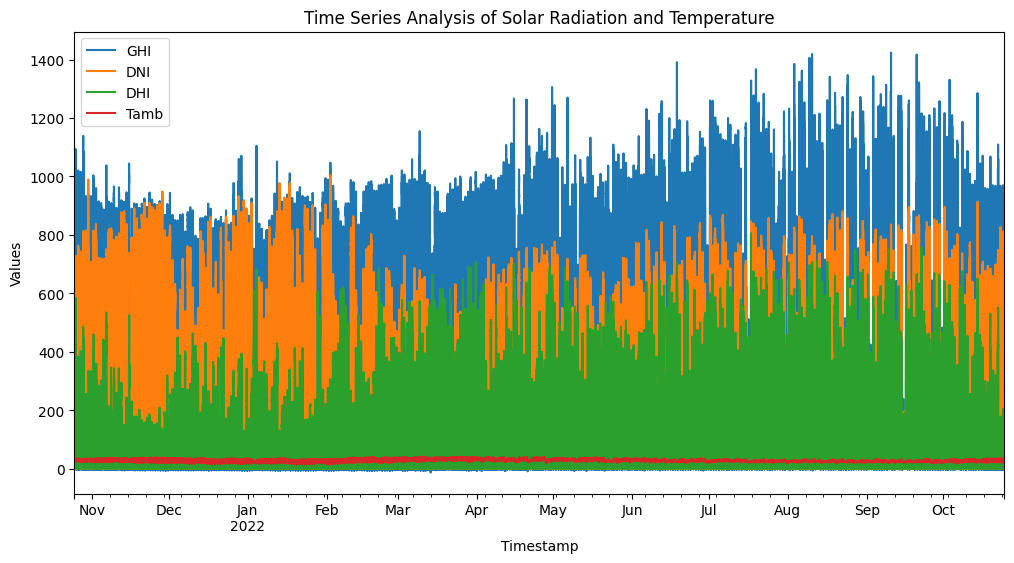

In [87]:
# Plotting GHI, DNI, DHI, and Tamb against Timestamp
df[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(12, 6))
plt.title('Time Series Analysis of Solar Radiation and Temperature')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.show()

<Axes: xlabel='Cleaning'>

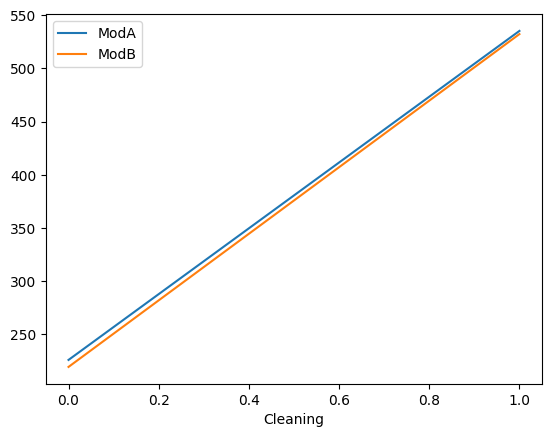

In [100]:
df.groupby('Cleaning')[['ModA', 'ModB']].mean().plot()

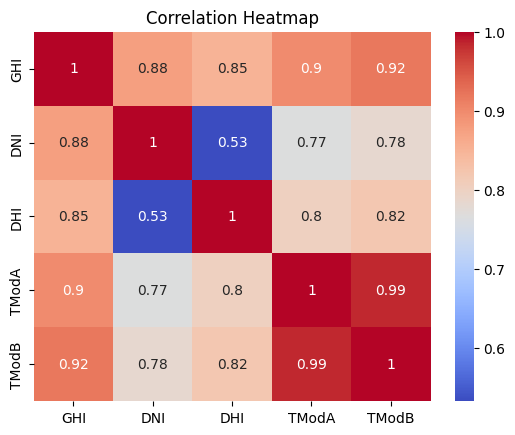

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt  # Also import matplotlib for plotting
# Assuming df is your DataFrame
sns.heatmap(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

(<Axes: xlabel='WS', ylabel='GHI'>, <Axes: xlabel='WS', ylabel='GHI'>)

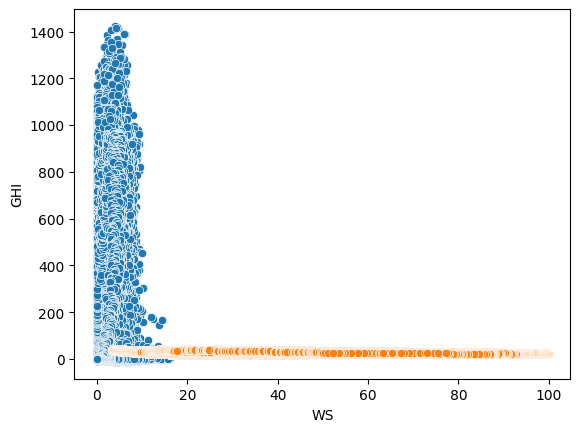

In [90]:
sns.scatterplot(data=df, x='WS', y='GHI'), sns.scatterplot(data=df, x='RH', y='Tamb')

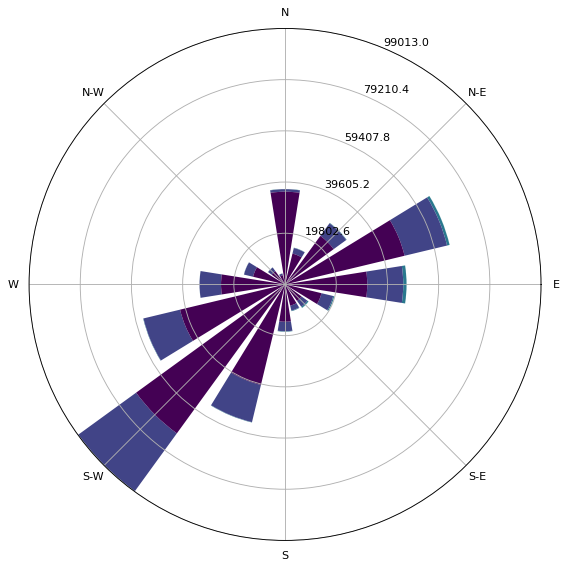

In [91]:
from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'])

In [92]:
import pandas as pd
import os

# Load the dataset with the correct path
df = pd.read_csv(r'C:\Users\hp\Music\data\togo-dapaong_qc.csv', encoding='latin-1')
# Define the country variable
country = 'togo'  # Set this to the appropriate country name

# Create the directory if it doesn't exist
os.makedirs('togo/data', exist_ok=True)

# Export the cleaned DataFrame to a CSV file
df.to_csv(f'togo/data/{"togo"}_clean.csv', index=False)

<Axes: >

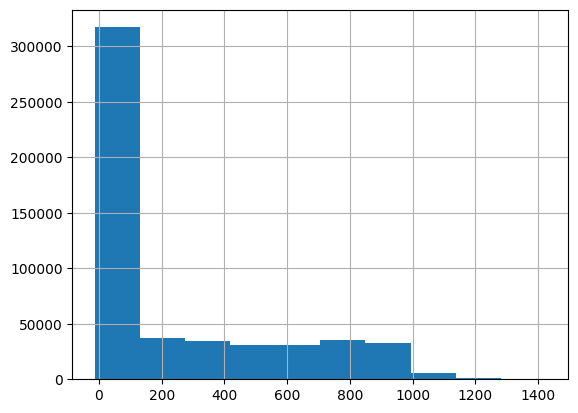

In [101]:
df['GHI'].hist()

<Axes: xlabel='RH', ylabel='Tamb'>

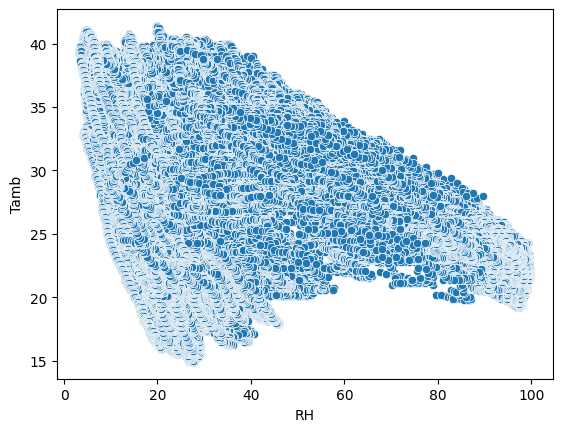

In [102]:
sns.scatterplot(data=df, x='RH', y='Tamb')

<Axes: xlabel='Tamb', ylabel='GHI'>

c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


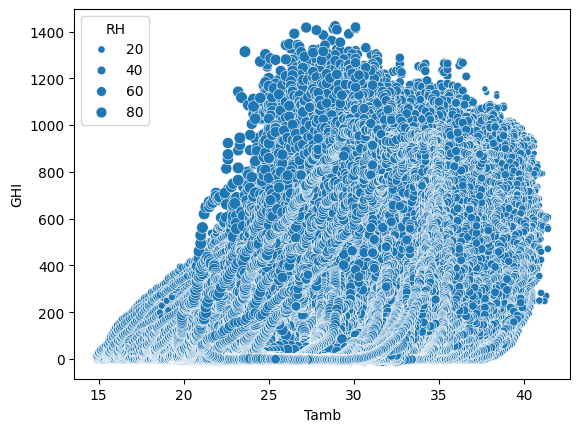

In [103]:
#Bubble Chart Analysis: Tamb vs. GHI with Size Representing RH
#The code snippet sns.scatterplot(data=df, x='Tamb', y='GHI', size='RH') generates a bubble chart to visualize the relationship between ambient temperature (Tamb) and Global Horizontal Irradiance (GHI), with the size of the bubbles representing relative humidity (RH). Here’s a detailed explanation:
sns.scatterplot(data=df, x='Tamb', y='GHI', size='RH') 

C:\Users\hp\AppData\Local\Temp\ipykernel_34204\130788378.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M', on='Timestamp')['GHI'].mean().plot(


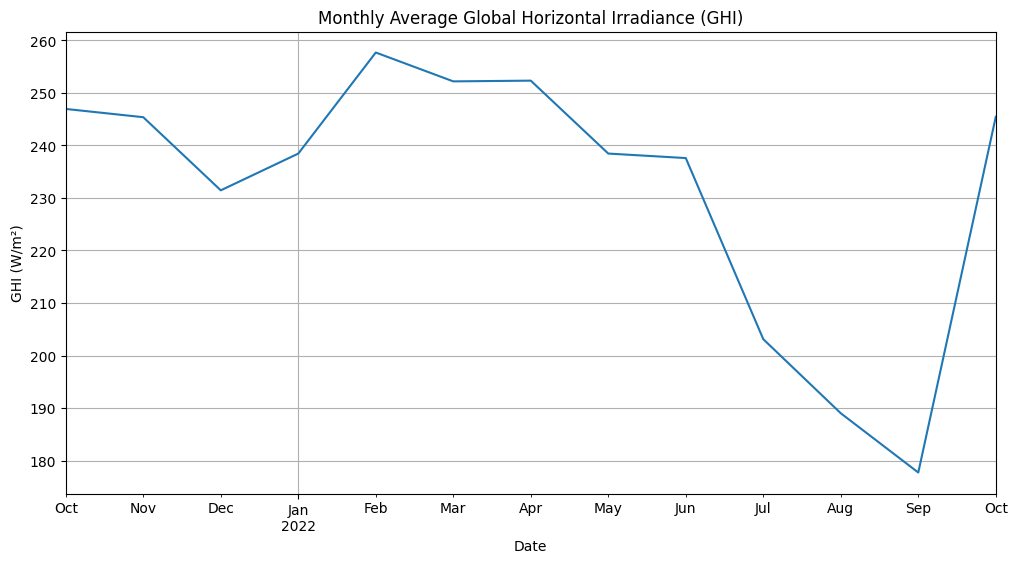

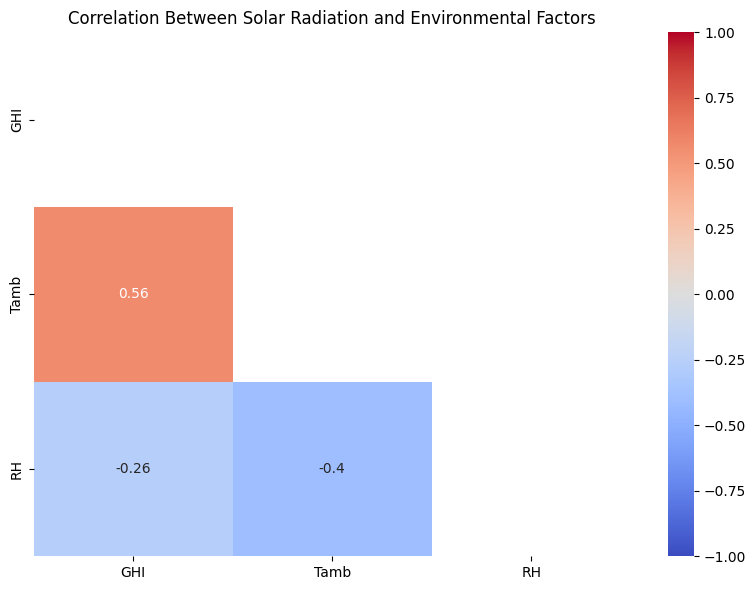

In [96]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
f = pd.read_csv(r'C:\Users\hp\Music\data\togo-dapaong_qc.csv', encoding='latin-1')


# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# --- Outlier Detection ---
# Select relevant columns and drop missing values first
temp_df = df[['GHI','DNI','DHI']].dropna()
z_scores = np.abs(stats.zscore(temp_df))
df_clean = df[(z_scores < 3).all(axis=1)].copy()

# --- Time Series Plot ---
plt.figure(figsize=(12, 6))
df.resample('M', on='Timestamp')['GHI'].mean().plot(
    title='Monthly Average Global Horizontal Irradiance (GHI)',
    xlabel='Date',
    ylabel='GHI (W/m²)'
)
plt.grid(True)
plt.show()

# --- Correlation Heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(df[['GHI','Tamb','RH']].corr(),
            annot=True,
            cmap='coolwarm',
            vmin=-1, vmax=1,
            mask=np.triu(np.ones_like(df[['GHI','Tamb','RH']].corr())))
plt.title('Correlation Between Solar Radiation and Environmental Factors')
plt.tight_layout()
plt.show()

In [ ]:
df_clean.to_csv(r'C:\Users\hp\Music\data\benin_clean.csv', index=False)

In [97]:
print("Columns in dataset:", df.columns.tolist())
print("Missing values:\n", df.isna().sum())

Columns in dataset: ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']
Missing values:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [98]:
df_clean.to_csv(r'C:\Users\hp\Music\data\benin_clean.csv', index=False)